In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from tqdm import tqdm

In [2]:
# prepare object points
nx = 9 # Numero de interseções em X do tabuleiro
ny = 6 # Numero de interseções em Y do tabuleiro
chessboard_size = (nx, ny)

# Array dos pontos detectados
obj_points = [] # Pontos 3d do mundo real 
img_points = [] # Pontos 3d do plano da imagem

objp = np.zeros((np.prod(chessboard_size),3),dtype=np.float32)
objp[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

100%|██████████| 35/35 [24:03<00:00, 41.24s/it]


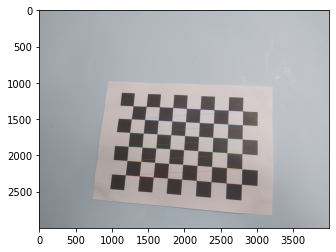

In [3]:
# USANDO UM CONJUNTO DE IMAGENS SEM A OPÇÃO DE CALIBRAÇÃO AUTOMATICA
calibration_paths = glob.glob('./images/calibration_images/Fotos calibração 2/*')

# Iteração nas imagens para encontrar a matriz intriseca
for image_path in tqdm(calibration_paths):
    #fname = 'chessboard.jpg.jpg'
    img = cv2.imread(image_path)
    # Conversão para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Método para achar as interseções do tabuleiro
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # Se encontrado, desenhar os cantos da interseção
    if ret == True:
        # Desenhar e printar o tabuleiro com os cantos da interseção
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        # Critério para aumentar precisão
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        # Refinamento da localização dos cantos por meio do critério.
        cv2.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria)
        obj_points.append(objp)
        img_points.append(corners)

In [4]:
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,gray.shape[::-1], None, None)

In [5]:
print("root mean square (RMS) re-projection error:")
print(ret)

root mean square (RMS) re-projection error:
2.5798773141052003


In [6]:
print("camera matrix k:")
print(K)

camera matrix k:
[[3.12638400e+03 0.00000000e+00 1.99384324e+03]
 [0.00000000e+00 3.12557182e+03 1.41499090e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [7]:
print("distortion coefficients: ")
print(dist)

distortion coefficients: 
[[ 0.14294342 -0.48042445 -0.0066124   0.00132706  0.4950992 ]]


In [8]:
print("rotation vector:")
print('[%s]' % ', '.join(map(str, rvecs)))

rotation vector:
[[[-0.00112228]
 [-0.48988971]
 [ 0.00173007]], [[-0.11021983]
 [ 0.27311065]
 [ 0.02445877]], [[-0.10359594]
 [-0.32621366]
 [ 0.00470574]], [[-0.06559684]
 [-0.08061009]
 [ 0.00115442]], [[-0.06107416]
 [-0.07174593]
 [-0.02799705]], [[-0.11523474]
 [-0.28393419]
 [-0.00677324]], [[-0.24031959]
 [-0.04092434]
 [-0.00978026]], [[-0.12164979]
 [-0.34963914]
 [-0.02569733]], [[-0.07672903]
 [ 0.01970392]
 [ 0.01742422]], [[-0.05213495]
 [ 0.25230858]
 [ 0.03655516]], [[-0.0571421 ]
 [-0.36781867]
 [-0.03738548]], [[-0.05823772]
 [-0.12183579]
 [-0.0429007 ]], [[-0.0640274 ]
 [-0.61908173]
 [-0.04071412]], [[-0.09813366]
 [-0.47693747]
 [-0.05922179]], [[-0.00611242]
 [-0.25415615]
 [-0.0375141 ]], [[-0.12194974]
 [-0.31744519]
 [-0.00204052]], [[0.05774466]
 [0.2378108 ]
 [0.01176283]], [[ 0.0372934 ]
 [-0.03996528]
 [-0.02212389]], [[0.01842294]
 [0.10926666]
 [0.01194773]], [[-0.15404242]
 [-0.03220221]
 [-0.00356754]], [[ 0.01539101]
 [-0.25446608]
 [-0.08090708]], [

In [9]:
print("translation vector: ")
print('[%s]' % ', '.join(map(str, tvecs)))

translation vector: 
[[[-2.74433137]
 [-2.43945648]
 [13.14066526]], [[-3.20834195]
 [-0.37785919]
 [17.87258028]], [[-1.79765972]
 [-5.29609913]
 [18.72377589]], [[-1.11173968]
 [-4.67941603]
 [16.64117921]], [[-2.18120832]
 [-2.47922807]
 [18.53167258]], [[-8.33118897]
 [ 0.90432815]
 [18.64375984]], [[-11.2289248 ]
 [  2.99929894]
 [ 22.89022133]], [[-4.16782145]
 [-0.50968237]
 [13.92911438]], [[-3.54953294]
 [-2.50084371]
 [14.90469229]], [[-2.68438159]
 [-1.78438114]
 [15.29236711]], [[-1.64636601]
 [-2.47957531]
 [19.02395998]], [[-4.45719288]
 [-2.43569868]
 [18.44856246]], [[-1.24166229]
 [-3.43951216]
 [22.92551155]], [[-6.51333974]
 [-3.83625576]
 [13.28188062]], [[-0.74584174]
 [-4.09522064]
 [15.5774366 ]], [[-0.7237245 ]
 [-4.14888284]
 [16.1770353 ]], [[-1.74770949]
 [-5.46214339]
 [20.15624387]], [[ 1.8183736 ]
 [-6.11506435]
 [19.38462574]], [[-8.10038952]
 [-2.9361873 ]
 [24.0753327 ]], [[ 1.50938178]
 [ 2.29359513]
 [21.470287  ]], [[-8.15333112]
 [-4.96833656]
 [17.

In [10]:
import PIL.ExifTags
import PIL.Image
# Dados exif para obter a distância focal 
exif_img = PIL.Image.open(calibration_paths[0])
exif_data = {
PIL.ExifTags.TAGS[k]:v
for k, v in exif_img._getexif().items()
if k in PIL.ExifTags.TAGS}# Distância focal em tupla
focal_length = exif_data['FocalLength']# Distância forcal em decimal
exif_data

{'GPSInfo': {1: 'S',
  2: (3.0, 47.0, 25.8864),
  3: 'W',
  4: (38.0, 32.0, 48.5448),
  5: b'\x00',
  6: 12.316,
  7: (16.0, 16.0, 37.0),
  27: b'ASCII\x00\x00\x00GPS\x00',
  29: '2021:05:02'},
 'ResolutionUnit': 2,
 'ExifOffset': 264,
 'Make': 'Xiaomi',
 'Model': 'Redmi Note 8',
 'Software': 'ginkgo-user 10 QKQ1.200114.002 V12.0.4.0.QCOMIXM release-keys',
 'Orientation': 1,
 'DateTime': '2021:05:02 13:16:37',
 'YCbCrPositioning': 1,
 'XResolution': 72.0,
 'YResolution': 72.0,
 'ExifVersion': b'0220',
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'ExifImageWidth': 4000,
 'ExifImageHeight': 3000,
 'DateTimeDigitized': '2021:05:02 13:16:37',
 'ExifInteroperabilityOffset': 3039,
 'SceneCaptureType': 0,
 'MeteringMode': 2,
 'FocalLengthIn35mmFilm': 0,
 'Flash': 16,
 'FocalLength': 4.74,
 'WhiteBalance': 0,
 'DateTimeOriginal': '2021:05:02 13:16:37',
 'ColorSpace': 1,
 'SubsecTime': '552747',
 'SubsecTimeOriginal': '552747',
 'SubsecTimeDigitized': '552747',
 'ShutterSpeedValue': 4.906,

In [11]:
ret

2.5798773141052003

In [12]:
K

array([[3.12638400e+03, 0.00000000e+00, 1.99384324e+03],
       [0.00000000e+00, 3.12557182e+03, 1.41499090e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [13]:
dist

array([[ 0.14294342, -0.48042445, -0.0066124 ,  0.00132706,  0.4950992 ]])

In [14]:
rvecs

[array([[-0.00112228],
        [-0.48988971],
        [ 0.00173007]]),
 array([[-0.11021983],
        [ 0.27311065],
        [ 0.02445877]]),
 array([[-0.10359594],
        [-0.32621366],
        [ 0.00470574]]),
 array([[-0.06559684],
        [-0.08061009],
        [ 0.00115442]]),
 array([[-0.06107416],
        [-0.07174593],
        [-0.02799705]]),
 array([[-0.11523474],
        [-0.28393419],
        [-0.00677324]]),
 array([[-0.24031959],
        [-0.04092434],
        [-0.00978026]]),
 array([[-0.12164979],
        [-0.34963914],
        [-0.02569733]]),
 array([[-0.07672903],
        [ 0.01970392],
        [ 0.01742422]]),
 array([[-0.05213495],
        [ 0.25230858],
        [ 0.03655516]]),
 array([[-0.0571421 ],
        [-0.36781867],
        [-0.03738548]]),
 array([[-0.05823772],
        [-0.12183579],
        [-0.0429007 ]]),
 array([[-0.0640274 ],
        [-0.61908173],
        [-0.04071412]]),
 array([[-0.09813366],
        [-0.47693747],
        [-0.05922179]]),
 array

In [15]:
img = cv2.imread('images/teclado.jpg')
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(K, dist, (w,h), 1, (w,h))

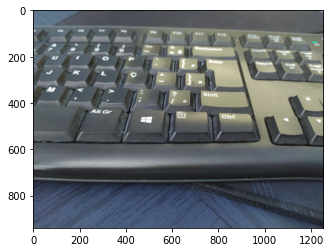

In [16]:
dst = cv2.undistort(img, K, dist, None, newcameramtx)

x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png', dst)
plt.imshow(dst)

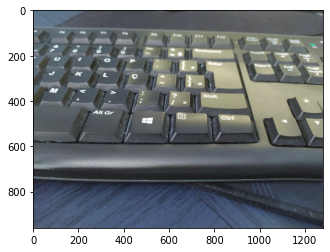

In [17]:
plt.imshow(img)

In [18]:
mean_error = 0
for i in range(len(obj_points)):
    imgpoints2, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], K, dist)
    error = cv2.norm(img_points[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(obj_points)) )

total error: 0.34111631488689675


In [25]:
#Save parameters into numpy file
np.save("./camera_params/ret", ret)
np.save("./camera_params/K", K)
np.save("./camera_params/dist", dist)
np.save("./camera_params/rvecs", rvecs)
np.save("./camera_params/tvecs", tvecs)
np.save("./camera_params/FocalLength", focal_length)

In [30]:
x = K.astype(">i2")
np.ndarray.tofile(x)

TypeError: tofile() missing required argument 'file' (pos 1)